In [1]:
# Import Libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\dev\anaconda3\envs\data_py311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

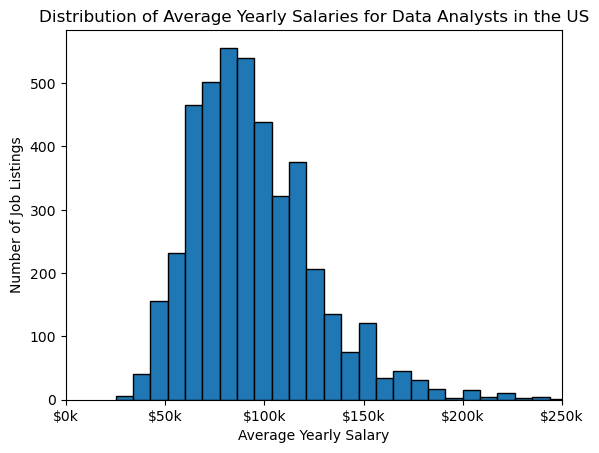

In [10]:
df_DA_US['salary_year_avg'].plot(kind='hist' , bins=40, edgecolor='black')
plt.xlim(0, 250000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))

plt.title('Distribution of Average Yearly Salaries for Data Analysts in the US')
plt.xlabel('Average Yearly Salary')
plt.ylabel('Number of Job Listings')
plt.show()